<a href="https://colab.research.google.com/github/Amelbnmbh/BankingTransactions/blob/main/BankingTransactions_AmelMosbah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1><i>Cleaning and Processing Our Banking Transactions Dataset</i></h1>
</center>

<p align="center">
  <img src="https://kinsta.com/fr/wp-content/uploads/sites/4/2021/06/liste-codes-carte-bancaire-refusee.png" width="800"/>
</p>



<p>In this project, we worked on a banking transactions dataset that requires meticulous cleaning and processing to ensure reliable analyses. The cleaning process involves identifying and removing duplicates, handling missing values, and correcting inconsistencies. Once these steps are completed, the data is ready to be analyzed to extract relevant information and make informed decisions.</p>

<center>
<p> realised by <b>Amel MOSBAH </p>


#Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
op = pd.read_csv("operations.csv")

#Data Exploration

In [ ]:
op.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [ ]:
op.dtypes

,0
date_operation,object
libelle,object
montant,float64
solde_avt_ope,float64
categ,object


We observe that the <b>date_operation</b> column is currently of type <b>object</b>. We need to convert it to the <b>date</b> type.

<h3>Check for missing values in the dataset</h3>

In [ ]:
op.isnull().sum()

,0
date_operation,0
libelle,0
montant,2
solde_avt_ope,0
categ,1


We note that the <b>montant</b> column has two missing values, and the <b>categ</b> column has one missing value.

# Data Preparation

<h2>1.Converting to the date type

In [ ]:
op['date_operation'] = pd.to_datetime(op['date_operation'])

In [ ]:
#cheking
op.dtypes

,0
date_operation,datetime64[ns]
libelle,object
montant,float64
solde_avt_ope,float64
categ,object


<h2> Missing values

<h3>Identify rows with missing 'montant' or 'categ'



In [ ]:
missing_rows = op[op['montant'].isnull() | op['categ'].isnull()]
missing_rows

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
269,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


<h3>Fill missing categories

In [ ]:
#Find the categories for a specific 'libelle' : 'PRELEVEMENT XX TELEPHONE XX XX'
find_categ_value = op.loc[op['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', 'categ']
find_categ_value

,categ
8,FACTURE TELEPHONE
62,FACTURE TELEPHONE
102,FACTURE TELEPHONE
156,NaN
204,FACTURE TELEPHONE
260,FACTURE TELEPHONE
308,FACTURE TELEPHONE


We observe that all categories where the <b>'libelle'</b> is <b>'PRELEVEMENT XX TELEPHONE XX XX'</b> are classified as <b>'FACTURE TELEPHONE'</b>; therefore, we should fill the missing value with <b>'FACTURE TELEPHONE'</b> as well.

In [ ]:
#Fill missing categories
op.loc[
    (op['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX') & (op['categ'].isna()),
    'categ'
] = 'FACTURE TELEPHONE'

In [ ]:
#Checking
op.loc[op['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', 'categ']

,categ
8,FACTURE TELEPHONE
62,FACTURE TELEPHONE
102,FACTURE TELEPHONE
156,FACTURE TELEPHONE
204,FACTURE TELEPHONE
260,FACTURE TELEPHONE
308,FACTURE TELEPHONE


<h3>Fill missing "montant"

**libelle** : 'CARTE XX XX LES ANCIENS ROBINSON XX' and **categ** : 'COURSES'

In [ ]:
#Find amounts for a libelle : 'CARTE XX XX LES ANCIENS ROBINSON XX' and categ : 'COURSES'
find_amount1_value = op.loc[(op['libelle'] == 'CARTE XX XX LES ANCIENS ROBINSON XX') & (op['categ'] == 'COURSES'), 'montant']

#Calculate the mean of the found amounts
mean_amount1 = round(find_amount1_value.mean(), 2)

#Fill NaN values with the calculated mean
op.loc[(op['libelle'] == 'CARTE XX XX LES ANCIENS ROBINSON XX') & (op['categ'] == 'COURSES'), 'montant'] = \
find_amount1_value.fillna(mean_amount1)

**libelle** : 'CARTE XX XX XX XX' and **categ** : 'AUTRE'

In [ ]:
#Repeat the same steps :
find_amount2_value = op.loc[(op['libelle'] == 'CARTE XX XX XX XX') & (op['categ'] == 'AUTRE'), 'montant']

mean_amount2 = round(find_amount2_value.mean(), 2)

op.loc[(op['libelle'] == 'CARTE XX XX XX XX') & (op['categ'] == 'AUTRE'), 'montant'] = \
    find_amount2_value.fillna(mean_amount2)


In [ ]:
#checking
op.isnull().sum()

,0
date_operation,0
libelle,0
montant,0
solde_avt_ope,0
categ,0


<H2>3.Check for duplicates

 <H3>Check unique values in the 'categ' column

In [ ]:
op['categ'].unique()

array(['AUTRE', 'TRANSPORT', 'FACTURE TELEPHONE', 'COURSES',
       'COTISATION BANCAIRE', 'RESTAURANT', 'LOYER'], dtype=object)

<H3>Check unique values in the 'LIBELLE' column

In [ ]:
op['libelle'].unique()

array(['DON XX XX XX XX XX XX XX', 'CARTE XX XX RAPT XX',
       'VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX',
       'VIREMENT XX XX XX XX XX XX', 'CARTE XX XX XX XX',
       'CARTE XX XX XX XX XX', 'PRELEVEMENT XX TELEPHONE XX XX',
       'CARTE XX XX LES ANCIENS ROBINSON XX',
       'FORFAIT COMPTE SUPERBANK XX XX XX XX',
       'VIREMENT XX XX XX XX XX XX XX XX XX XX',
       'CARTE XX XX CHEZ LUC XX', 'CARTE XX XX XX XX XX XX',
       'CARTE XX XX XX XX XX XX XX XX XX XX', 'CARTE XX XX VELOC XX XX',
       'VIREMENT XX XX XX XX XX XX XX', 'XX XX XX XX XX XX XX',
       'VIREMENT PERMANENT LOYER', 'RETRAIT XX XX XX',
       "CARTE XX XX L'EPICERIE DEMBAS XX XX",
       'CARTE XX XX LA LOUVE XX XX', 'XX XX VIREMENT XX XX XX',
       'CARTE XX XX TOUPTIPRI XX', 'CARTE XX XX LA CCNCF XX XX',
       'CARTE XX XX XX XX XX XX XX', 'XX XX CARTE XX XX XX',
       'CARTE XX XX XX XX XX XX XX XX', 'CARTE XX XX LA CCNCF XX',
       'CARTE XX XX XX XX LA CCNCF XX',
       'VIREMENT XX XX XX 

We notice the presence of multiple **similar** entries

<h3>Clean the 'libelle' column by removing 'XX' and extra spaces

In [ ]:
op['libelle'] = op['libelle'].str.replace("XX", "", regex=False).str.strip()
op['libelle'] = op['libelle'].str.replace(r'\s+', ' ', regex=True)

In [ ]:
#checking
op['libelle'].unique()

array(['DON', 'CARTE RAPT', 'VIREMENT', 'CARTE', 'PRELEVEMENT TELEPHONE',
       'CARTE LES ANCIENS ROBINSON', 'FORFAIT COMPTE SUPERBANK',
       'CARTE CHEZ LUC', 'CARTE VELOC', '', 'VIREMENT PERMANENT LOYER',
       'RETRAIT', "CARTE L'EPICERIE DEMBAS", 'CARTE LA LOUVE',
       'CARTE TOUPTIPRI', 'CARTE LA CCNCF', 'PRELEVEMENT'], dtype=object)

In [ ]:
#For better visualisation
unique_values = op['libelle'].unique()
for value in unique_values:
    print(value)

DON
CARTE RAPT
VIREMENT
CARTE
PRELEVEMENT TELEPHONE
CARTE LES ANCIENS ROBINSON
FORFAIT COMPTE SUPERBANK
CARTE CHEZ LUC
CARTE VELOC

VIREMENT PERMANENT LOYER
RETRAIT
CARTE L'EPICERIE DEMBAS
CARTE LA LOUVE
CARTE TOUPTIPRI
CARTE LA CCNCF
PRELEVEMENT


We notice that there is an **empty** row

In [ ]:
#find the empty row
empty_row = op[op['libelle'] == ""]
empty_row

,date_operation,libelle,montant,solde_avt_ope,categ
26,2023-04-13,,-280.0,4461.5,AUTRE


In [ ]:
# Find the libelle and count occurrences
find_libelle_counts = op.loc[op['categ'] == 'AUTRE', 'libelle'].value_counts()
find_libelle_counts.head(10)


,count
libelle,
CARTE,155
VIREMENT,23
CARTE L'EPICERIE DEMBAS,16
RETRAIT,9
DON,7
,1
PRELEVEMENT,1


I notice that most of the 'libelle' in the 'Autre' category are "CARTE". Therefore, I need to fill the empty 'libelle' values with 'CARTE'.

In [ ]:
# Fill empty 'libelle' values with 'CARTE'
op.loc[op['libelle'] == "", 'libelle'] = 'CARTE'

In [ ]:
#Cheking
unique_values = op['libelle'].unique()
for value in unique_values:
    print(value)

DON
CARTE RAPT
VIREMENT
CARTE
PRELEVEMENT TELEPHONE
CARTE LES ANCIENS ROBINSON
FORFAIT COMPTE SUPERBANK
CARTE CHEZ LUC
CARTE VELOC
VIREMENT PERMANENT LOYER
RETRAIT
CARTE L'EPICERIE DEMBAS
CARTE LA LOUVE
CARTE TOUPTIPRI
CARTE LA CCNCF
PRELEVEMENT


#Variable Representation

<h2>The Empirical Distribution of Qualitative Variables :

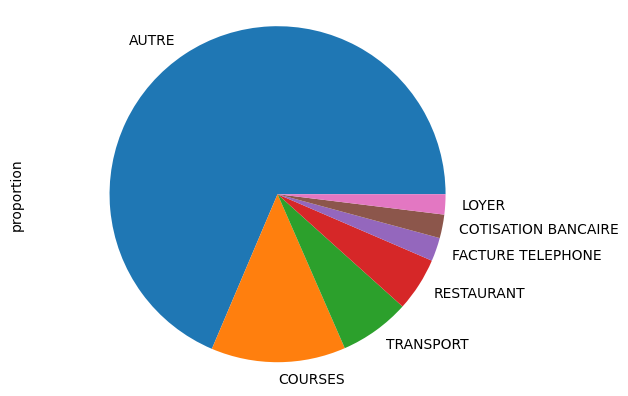

In [ ]:
# Diagramme en secteurs
op["categ"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')
plt.show()

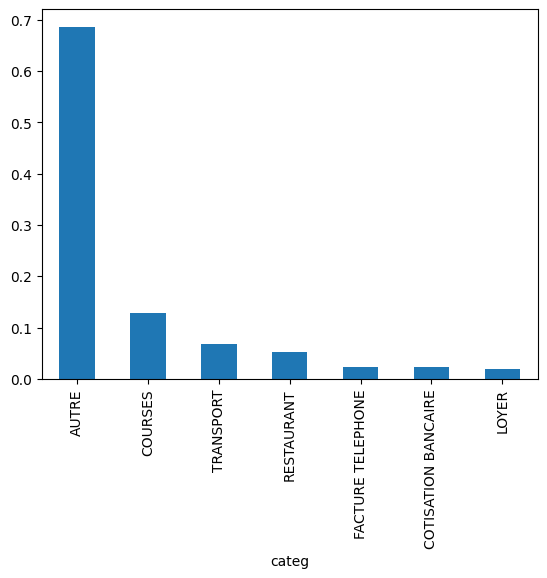

In [ ]:
# Diagramme en tuyaux d'orgues
op["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

<h2>The Empirical Distribution of Quantitative Variables :

<h3>Discrete Variables

In [ ]:
op['quart_mois'] = [int((jour-1)*4/31)+1 for jour in op["date_operation"].dt.day]

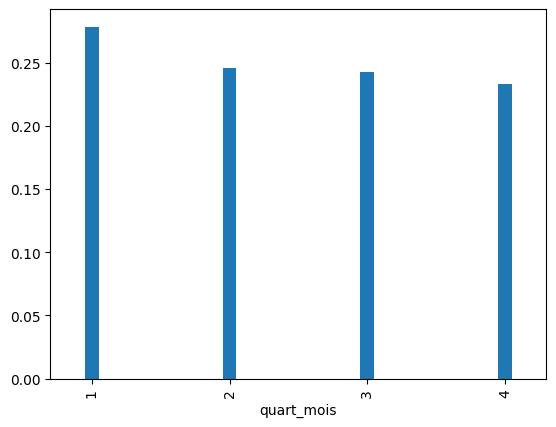

In [ ]:
op["quart_mois"].value_counts(normalize= True ).plot(kind='bar',width=0.1)
plt.show()

<h3>Continuous Variables

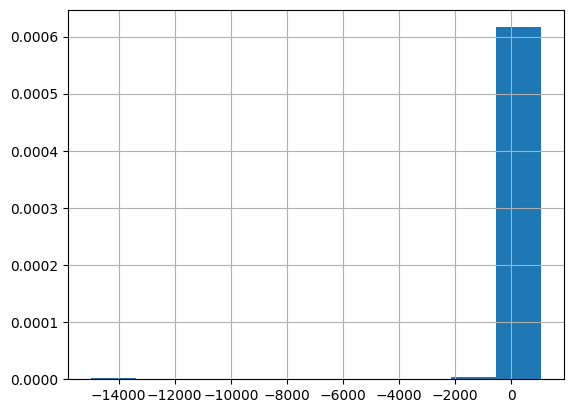

In [ ]:
# Histogramme
op["montant"].hist(density=True)
plt.show()

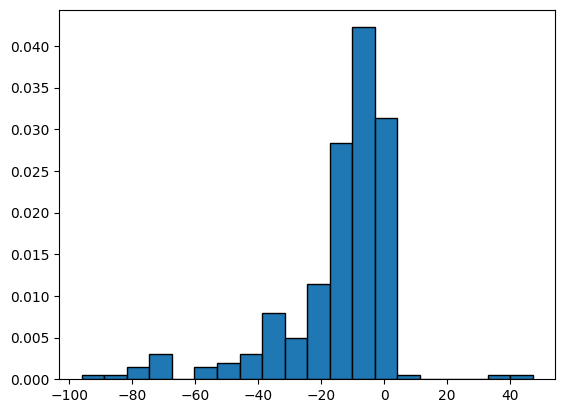

In [ ]:
# For better visualization
op[op['montant'].abs() < 100]['montant'].hist(density=True, bins=20, grid=False, edgecolor='black')
plt.show()

<h3>Represent the variables in tabular form

In [ ]:
effectifs = op["quart_mois"].value_counts()
# The index of effectifs contains the modalities
modalites = effectifs.index

# Creating the table from the modalities
tab = pd.DataFrame(modalites, columns=["quart_mois"])
tab["n"] = effectifs.values

# len(data) returns the sample size
tab["f"] = tab["n"] / len(op)
tab

,quart_mois,n,f
0,1,86,0.278317
1,2,76,0.245955
2,3,75,0.242718
3,4,72,0.233010


In [ ]:
# Sorting the values of variable X (in ascending order)
tab = tab.sort_values("quart_mois")
# cumsum calculates the cumulative sum
tab["F"] = tab["f"].cumsum()
tab

,quart_mois,n,f,F
0,1,86,0.278317,0.278317
1,2,76,0.245955,0.524272
2,3,75,0.242718,0.766990
3,4,72,0.233010,1.000000


<h2>Measures of central tendency

<h3>Mode

In [ ]:
op["montant"].mode()

,montant
0,-1.6


<h3>Median

In [ ]:
op["montant"].median()

-9.6

<h3>Mean

In [ ]:
op["montant"].mean()

-46.907702265372166

In [ ]:
# Displaying
print(f"The mode of the operation amounts is: {op['montant'].mode()[0]:.2f} €")
print(f"The median of the operation amounts is: {op['montant'].median():.2f} €")
print(f"The mean of the operation amounts is: {op['montant'].mean():.2f} €")

The mode of the operation amounts is: -1.60 €
The median of the operation amounts is: -9.60 €
The mean of the operation amounts is: -46.91 €


The operation amounts exhibit significant variability: some expenses (negative amounts) can be substantial, such as rent, while others are typically small, like groceries and phone bills. In contrast, income entries (positive amounts) are infrequent but can also be significant. As a result, interpreting the mean is challenging because it is highly influenced by outliers.

So, I will group the data by category and calculate it again to better understand.

In [ ]:
# Group data by category and calculate the mean, median, and mode
for categ in op['categ'].unique():
    subset = op[op['categ'] == categ]
    mean_amount = subset['montant'].mean()
    median_amount = subset['montant'].median()
    mode_amount = subset['montant'].mode()

    print(f"For the category {categ}:")
    print(f"  Mean of the amounts: {mean_amount:.2f} €")
    print(f"  Median of the amounts: {median_amount:.2f} €")
    print(f"  Mode of the amounts: {mode_amount[0]:.2f} €")

    print()


For the category AUTRE:
  Mean of the amounts: -48.99 €
  Median of the amounts: -8.31 €
  Mode of the amounts: -1.60 €

For the category TRANSPORT:
  Mean of the amounts: -53.00 €
  Median of the amounts: -53.10 €
  Mode of the amounts: -73.00 €

For the category FACTURE TELEPHONE:
  Mean of the amounts: -12.05 €
  Median of the amounts: -7.02 €
  Mode of the amounts: -7.02 €

For the category COURSES:
  Mean of the amounts: -16.59 €
  Median of the amounts: -12.37 €
  Mode of the amounts: -32.67 €

For the category COTISATION BANCAIRE:
  Mean of the amounts: -1.89 €
  Median of the amounts: -1.92 €
  Mode of the amounts: -1.92 €

For the category RESTAURANT:
  Mean of the amounts: -10.33 €
  Median of the amounts: -10.10 €
  Mode of the amounts: -9.20 €

For the category LOYER:
  Mean of the amounts: -345.00 €
  Median of the amounts: -345.00 €
  Mode of the amounts: -345.00 €



In [ ]:
#For better visualisation
results = []
for categ in op['categ'].unique():
    subset = op[op['categ'] == categ]
    mean_amount = subset['montant'].mean()
    median_amount = subset['montant'].median()
    mode_amount = subset['montant'].mode()

    # Append the results as a dictionary
    results.append({
        'Category': categ,
        'Mean (€)': mean_amount,
        'Median (€)': median_amount,
        'Mode (€)': mode_amount[0]
    })

results_df = pd.DataFrame(results)
results_df

,Category,Mean (€),Median (€),Mode (€)
0,AUTRE,-48.986462,-8.310,-1.60
1,TRANSPORT,-52.997143,-53.100,-73.00
2,FACTURE TELEPHONE,-12.045714,-7.020,-7.02
3,COURSES,-16.589250,-12.365,-32.67
4,COTISATION BANCAIRE,-1.885714,-1.920,-1.92
5,RESTAURANT,-10.332500,-10.100,-9.20
6,LOYER,-345.000000,-345.000,-345.00


###Interpretations:
**AUTRE:** The amounts show a lot of variation. The high mean suggests that a few large transactions are influencing the average, while the median and mode indicate most transactions are smaller.

**TRANSPORT:** The amounts are consistent, with the mean and median close together.

**FACTURE TELEPHONE:** The amounts are uniform, with the mean, median, and mode being nearly identical. This indicates stable telephone bills.

**COURSES: **Grocery expenses vary somewhat, with a higher mean than median. This suggests a few large purchases are affecting the average, while the mode indicates frequent smaller transactions.

**COTISATION BANCAIRE:** The amounts are consistent, with nearly the same mean, median, and mode. This suggests stable banking fees.

**RESTAURANT:** Restaurant expenses are also consistent, with similar mean, median, and mode values, indicating stable dining costs.

**LOYER:** Rent amounts are identical for mean, median, and mode, reflecting fixed rent payments with no variation.

<h2>Measures of Dispersion

<H3>The Empirical Variance

In [ ]:
op["montant"].var()

759695.8254119105

In [ ]:
variance_corrected = op["montant"].var(ddof=1)
print(f"The corrected empirical variance is: {variance_corrected:.2f}")


The corrected empirical variance is: 759695.83


<h3>The Empirical Standard Deviation : (L'écart-type)

In [ ]:
op["montant"].std()

871.6053151581342

In [ ]:
# Coefficient of Variation
op["montant"].std()/op["montant"].mean()

-18.58128352199344

<h3>The box plot

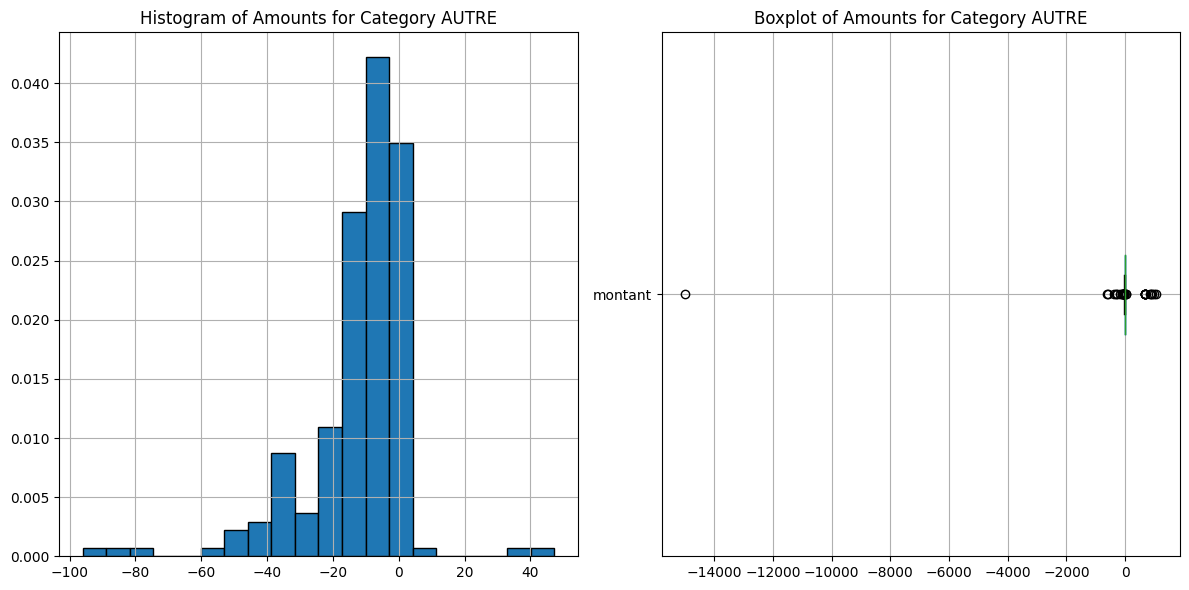

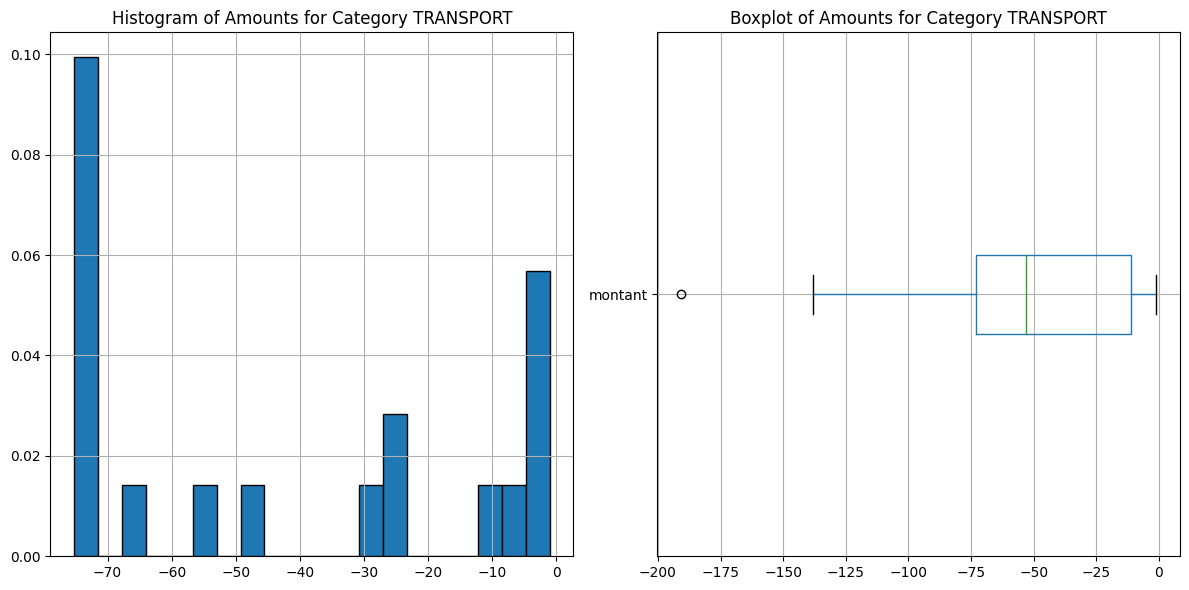

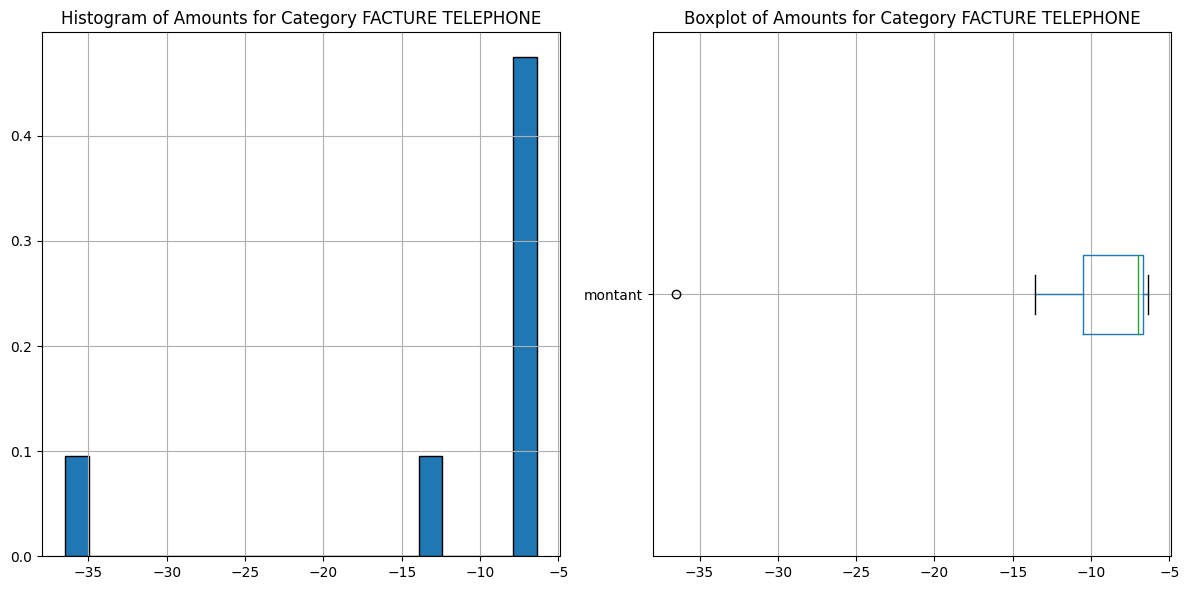

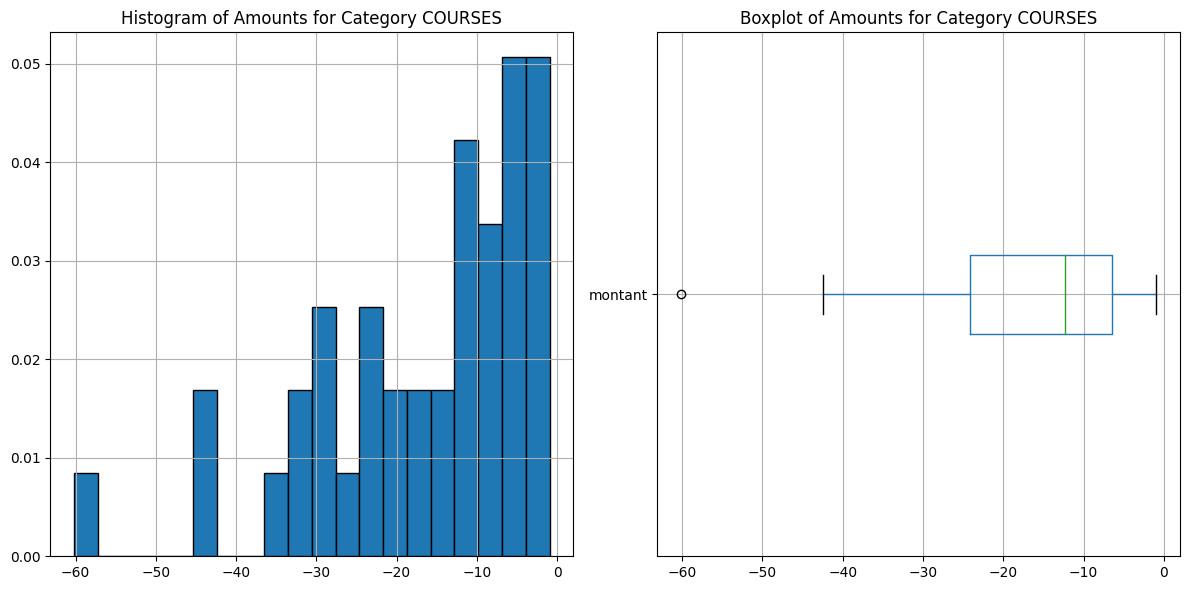

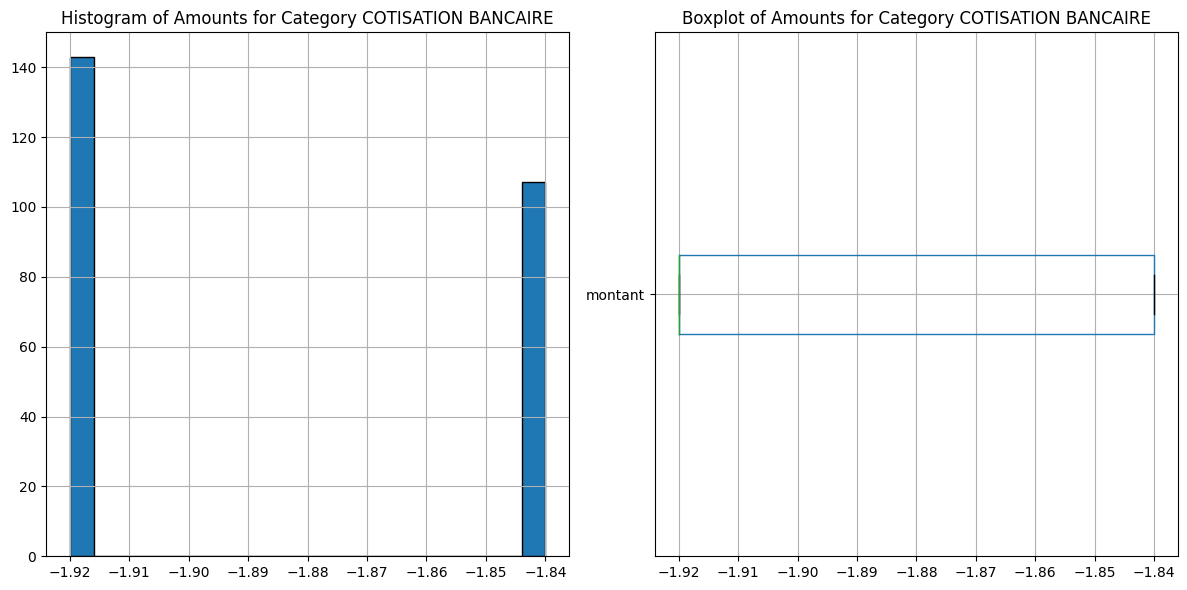

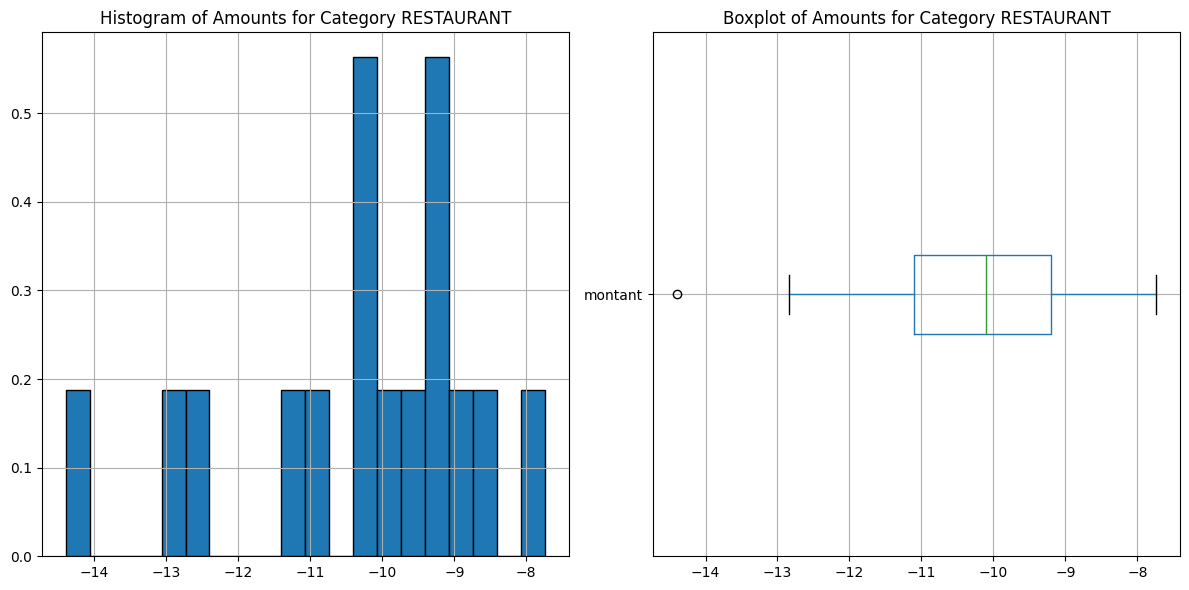

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


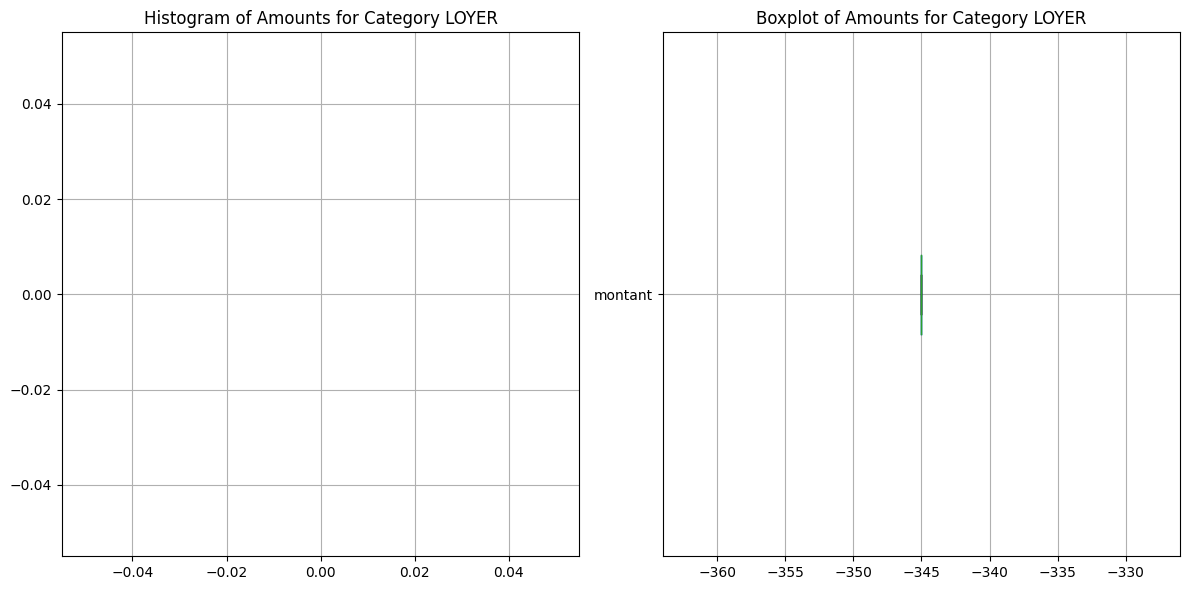

In [ ]:
for categ in op['categ'].unique():
    subset = op[op['categ'] == categ]

    fig, axs = plt.subplots(1, 2, figsize=(12,6))

    # Histogram
    axs[0].set_title(f"Histogram of Amounts for Category {categ}")
    subset[subset.montant.abs() < 100]["montant"].hist(ax=axs[0], density=True, bins=20,edgecolor='black')

    # Boxplot
    axs[1].set_title(f"Boxplot of Amounts for Category {categ}")
    subset.boxplot(column="montant", vert=False, ax=axs[1])

    plt.tight_layout()
    plt.show()

**NB** : LOYER : a stable amount

<h2> Measures of shape

<h3>Skewness


In [ ]:
op["montant"].skew()

-16.466063998302

As long as the <b>skewness < 0 </b>, the data distribution is skewed to the <b> left</b>. Let's check it.

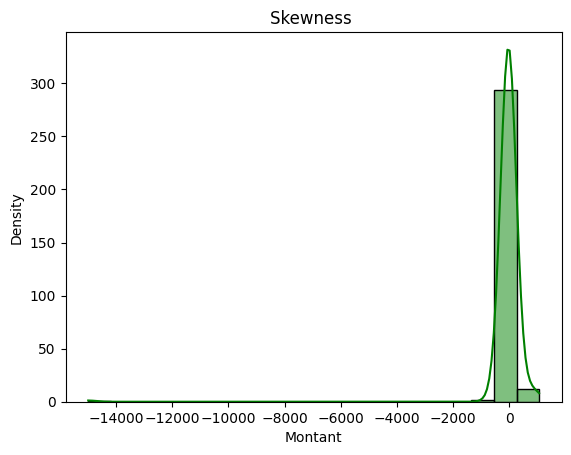

In [ ]:
skewness = op['montant'].skew()
sns.histplot(op['montant'], bins=20, kde=True, color='green')
plt.title(f'Skewness ')
plt.xlabel('Montant')
plt.ylabel('Density')
plt.show()

In [ ]:
from scipy.stats import skew
SKNEW = []
for categ in op['categ'].unique():
    subset = op[op['categ'] == categ]
    skewness = skew(subset['montant'])

    SKNEW.append({
        'Catégorie': categ,
        'Skewness': skewness,
    })
SK = pd.DataFrame(SKNEW)
SK

<ipython-input-339-467c41b259fd>:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(subset['montant'])


,Catégorie,Skewness
0,AUTRE,-13.624477
1,TRANSPORT,-1.157273
2,FACTURE TELEPHONE,-1.842113
3,COURSES,-1.148576
4,COTISATION BANCAIRE,0.288675
5,RESTAURANT,-0.802799
6,LOYER,NaN


<h3>Le Kurtosis

In [ ]:
op["montant"].kurtosis()

283.7950993535236

The high kurtosis of **283.79** indicates a highly concentrated distribution of amounts with many extreme values, suggesting potential outliers.

<h2>Measures of Concentration

<h2>The Lorenz Curve

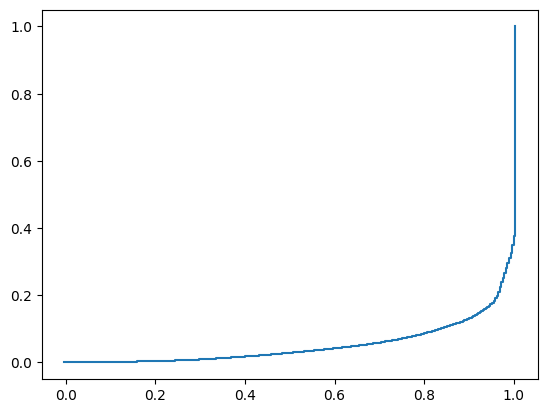

In [ ]:
depense = op[op['montant'] < 0 ]
dep = -depense['montant'].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1)

plt.plot(xaxis, lorenz, drawstyle='steps-post')
plt.show()

Médiale = 1

<h2>Gini index

In [ ]:
AUC = (lorenz.sum(0) - lorenz[-1]/2 - lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
gini

0.8930571785423692

The Gini coefficient of approximately **0.89** signifies a high level of **inequality.**

#Bivariate Analysis

<h2>Quantitative Correlation

<h3>the scatter plot

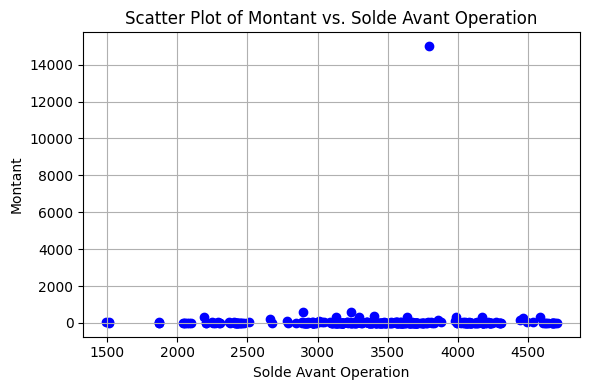

In [ ]:
depense = op[op['montant'] < 0]
dep = -depense['montant'].values
solde_avt_ope = depense['solde_avt_ope'].values

plt.figure(figsize=(6, 4))
plt.scatter(solde_avt_ope, dep, alpha=1, color='blue')
plt.title('Scatter Plot of Montant vs. Solde Avant Operation')
plt.xlabel('Solde Avant Operation')
plt.ylabel('Montant')
plt.grid()
plt.tight_layout()
plt.show()

The points are quite scattered and numerous, making it difficult to see clearly

<Figure size 1000x600 with 0 Axes>

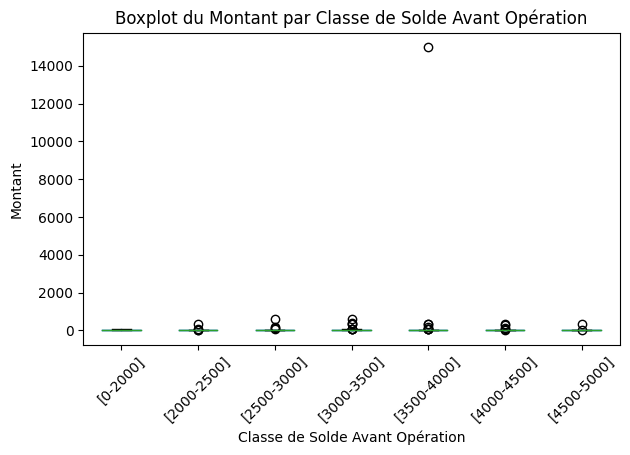

In [ ]:
data = pd.DataFrame({'Solde Avant Operation': solde_avt_ope, 'Montant': dep})

# Définir les classes pour le solde avant opération
bins = [0, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
labels = ['[0-2000]', '[2000-2500]', '[2500-3000]', '[3000-3500]', '[3500-4000]', '[4000-4500]', '[4500-5000]']
data['Classe Solde'] = pd.cut(data['Solde Avant Operation'], bins=bins, labels=labels)

# Créer le diagramme de boxplots
plt.figure(figsize=(10, 6))
data.boxplot(column='Montant', by='Classe Solde', grid=False)
plt.title('Boxplot du Montant par Classe de Solde Avant Opération')
plt.suptitle('')  # Enlève le titre par défaut
plt.xlabel('Classe de Solde Avant Opération')
plt.ylabel('Montant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


There is a problem iwll solve it asap

<h3>Empirical covariance and the correlation coefficient

In [ ]:
import scipy.stats as st
print(st.pearsonr(depense["solde_avt_ope"], -depense["montant"])[0])
print(np.cov(depense["solde_avt_ope"], -depense["montant"], ddof=0)[1,0])

0.034229552520030244
19508.63946547898


<h2>Linear Regression

In [ ]:
import datetime as dt

# Selection du sous-échantillon
courses = op[op.categ == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i, row in courses.iterrows():
    days = (row["date_operation"] - last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"]=r
courses = courses.iloc[1:,]

# On regroupe les opérations qui ont été effectuées à la même date
# (opérations réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant": a, "attente": b})

<ipython-input-347-7e1aaa823330>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=courses['date_operation'], y=courses['montant'], palette='viridis')


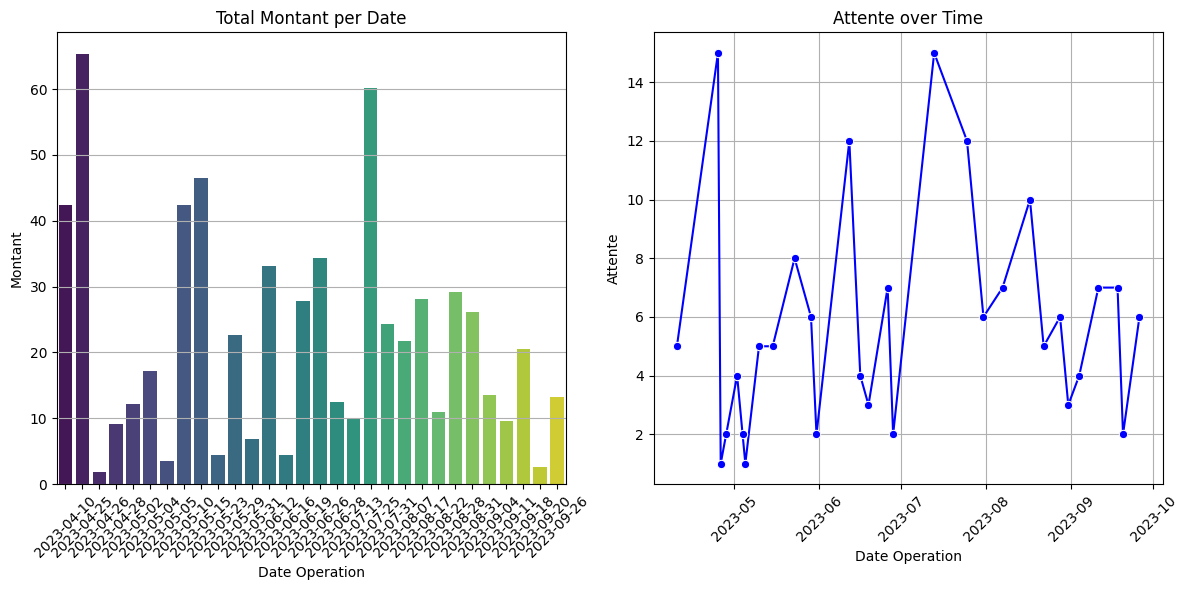

In [ ]:
courses.reset_index(inplace=True)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=courses['date_operation'], y=courses['montant'], palette='viridis')
plt.title('Total Montant per Date')
plt.xticks(rotation=45)
plt.xlabel('Date Operation')
plt.ylabel('Montant')
plt.grid(axis='y')

# Line Plot for Attente
plt.subplot(1, 2, 2)
sns.lineplot(x=courses['date_operation'], y=courses['attente'], marker='o', color='blue')
plt.title('Attente over Time')
plt.xticks(rotation=45)
plt.xlabel('Date Operation')
plt.ylabel('Attente')
plt.grid()

plt.tight_layout()
plt.show()


EXTRA

<h3>Scatter Plot

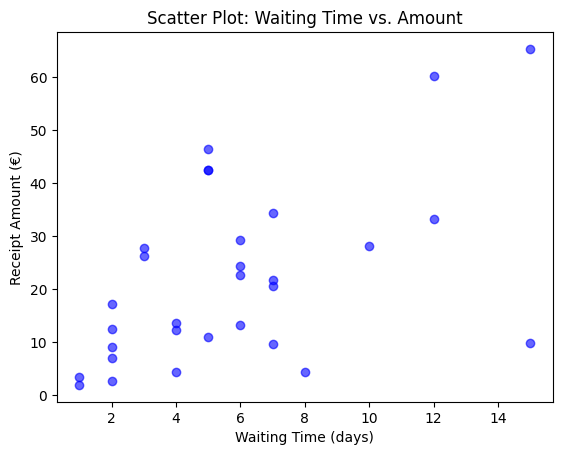

In [ ]:
plt.scatter(courses["attente"], courses["montant"], color='blue', alpha=0.6)
plt.title("Scatter Plot: Waiting Time vs. Amount")
plt.xlabel("Waiting Time (days)")
plt.ylabel("Receipt Amount (€)")
plt.show()


**Estimation**

In [ ]:
import statsmodels.api as sm
Y = courses["montant"]
X = sm.add_constant(courses["attente"])
X = X.copy()
X['intercept']= 1.

result = sm.OLS(Y, X).fit()
a,b = result.params['attente'],result.params['intercept']

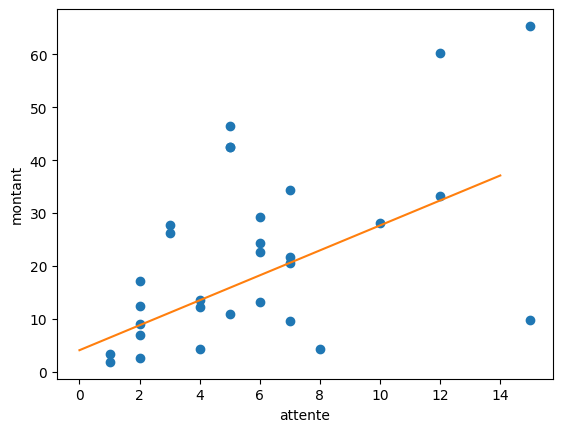

In [ ]:
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

<h2>ANOVA Analysis

In [ ]:
X = "categ"  # qualitative

Y = "montant"  # quantitative

sous_echantillon = op[op["montant"] < 0].copy()

sous_echantillon["montant"] = -sous_echantillon["montant"]

sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"]


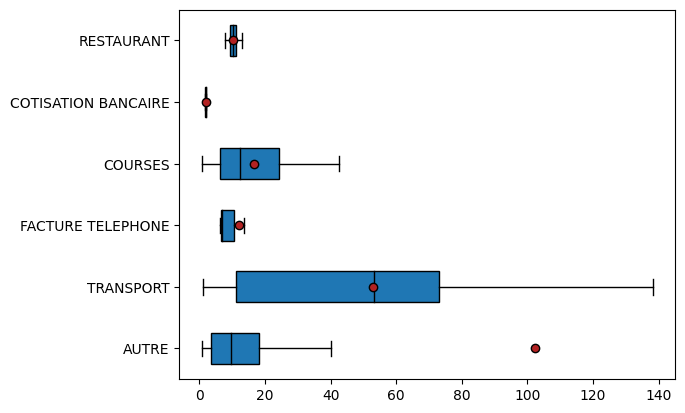

In [ ]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X] == m][Y])

medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [ ]:
X = "categ"  # qualitative

Y = "montant"  # quantitative

sous_echantillon = op[op["montant"] < 0].copy()

def eta_squared(x, y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
      yi_classe = y[x == classe]
      classes.append({'ni': len(yi_classe),
                      'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(sous_echantillon[X], sous_echantillon[Y])

0.0037520811658925393

<h3>Quarter-Month

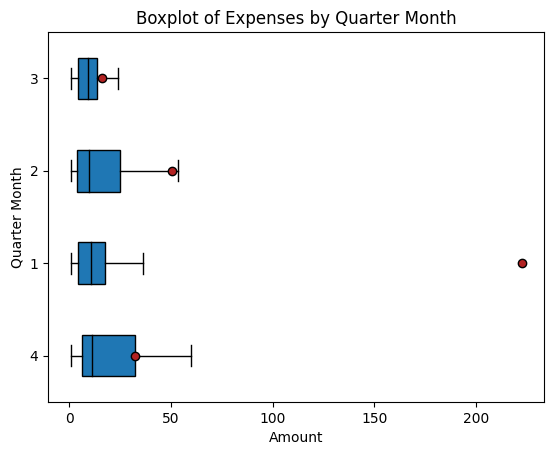

In [ ]:
X = "quart_mois"  # qualitative
Y = "montant"     # quantitative

sous_echantillon = op[op["montant"] < 0].copy()

sous_echantillon["montant"] = -sous_echantillon["montant"]

modalites = sous_echantillon[X].unique()

groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X] == m][Y])

# Create the box plot
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boxplot of Expenses by Quarter Month')
plt.xlabel('Amount')
plt.ylabel('Quarter Month')
plt.show()

In [ ]:
X = "quart_mois"  # qualitative
Y = "montant"     # quantitative

sous_echantillon = op[op["montant"] < 0].copy()
# Function to calculate Eta-squared
def eta_squared(x, y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj - moyenne_y) ** 2 for yj in y])
    SCE = sum([c['ni'] * (c['moyenne_classe'] - moyenne_y) ** 2 for c in classes])
    return SCE / SCT

eta_squared_value = eta_squared(sous_echantillon[X], sous_echantillon[Y])
print(f'Eta-squared: {eta_squared_value:.4f}')

Eta-squared: 0.0092


<h2>Chi-Squared Test

In [ ]:
X = "quart_mois"
Y = "categ"

cont = op [[X,Y]].pivot_table(index=X, columns=Y, aggfunc= len ,margins= True, margins_name="Total")
cont

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,55.0,7.0,6.0,6.0,NaN,3.0,9.0,86
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75
4,52.0,NaN,16.0,NaN,NaN,2.0,2.0,72
Total,212.0,7.0,40.0,7.0,6.0,16.0,21.0,309


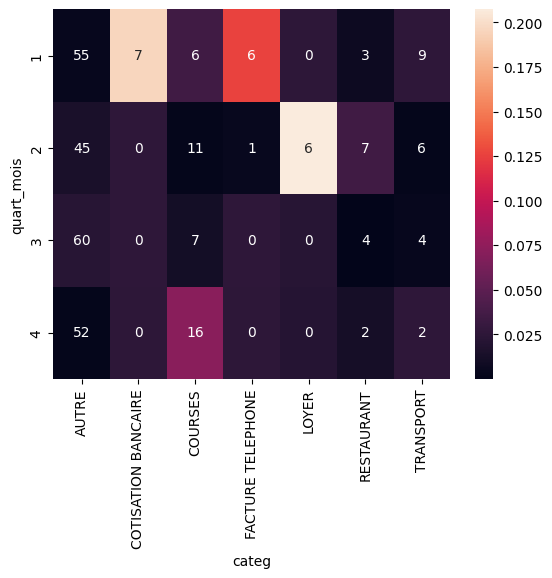

In [ ]:
# Extract the "Total" column
tx = cont.loc[:, ["Total"]]

# Extract the "Total" row
ty = cont.loc[["Total"], :]

# Calculate the total number of observations (individuals) based on the length of op
n = len(op)

# Calculate the independence table by performing a matrix product between tx and ty, then normalize by n
indep = tx.dot(ty) / n

# Replace NaN values in the contingency table with zeros
c = cont.fillna(0)

# Calculate the measure of non-independence
measure = (c - indep) ** 2 / indep

# Calculate the overall chi-squared statistic
xi_n = measure.sum().sum()

# Normalize the measure table by dividing by the overall statistic xi_n
table = measure / xi_n

# Create a heatmap from the normalized table, annotated with the observed values
sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()